# Proyecto 2: Análisis de algoritmos de machine learning


*   Hernán Mangas
*   Brayan Figueroa


## Pre-procesamiento de datos

Se importan las librerias necesarias para: 
*   Importar el dataset
*   Analizar los datos
*   Limpiar datos curruptos
*   Eliminar outliers



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore

### Importar datos

Se importa el dataset al entorno de trabajo

In [2]:
data_set = pd.read_csv('../input/water-potability/water_potability.csv') 
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### Limpieza de datos corruptos

Se revisa el formato de los datos que contiene cada columna

In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Se revisa por el número de valores NaN en cada columna

In [4]:
data_set.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Se limpian los valores NaN, reemplazandolos con el valor medio de su respectiva columna.

In [5]:
data_set = data_set.fillna(data_set.mean())

Se vuelve a revisar por valores NaN en el data set

In [6]:
data_set.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Eliminación de outliers

Se normalizan los datos con el metodo Min-Max

In [7]:
data_set = (data_set - data_set.min()) / (data_set.max() - data_set.min())
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


Se revisan las variables del dataset en busca de outliers, para esto se utiliza el grafico boxplot de cada columna del data set

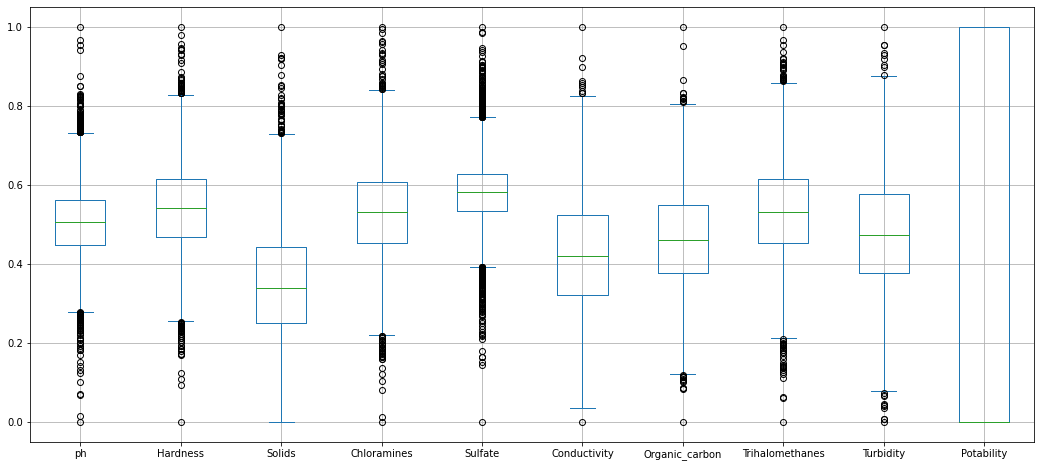

In [8]:
data_set.plot(kind = 'box',
              figsize = (18,8)
)
plt.grid()

Se limpian los outliers por el metodo Z-Scores, el cual elimina filas que contengan valores en alguna columna alejados un cierto número de desviaciones estandar de la media de la respectiva columna.

In [9]:
z_scores = zscore(data_set)
Datos_limpios = (np.abs(z_scores) < 2.8).all(axis=1)
data_set = data_set[Datos_limpios]

Se revisa una vez mas el gráfico de boxplot

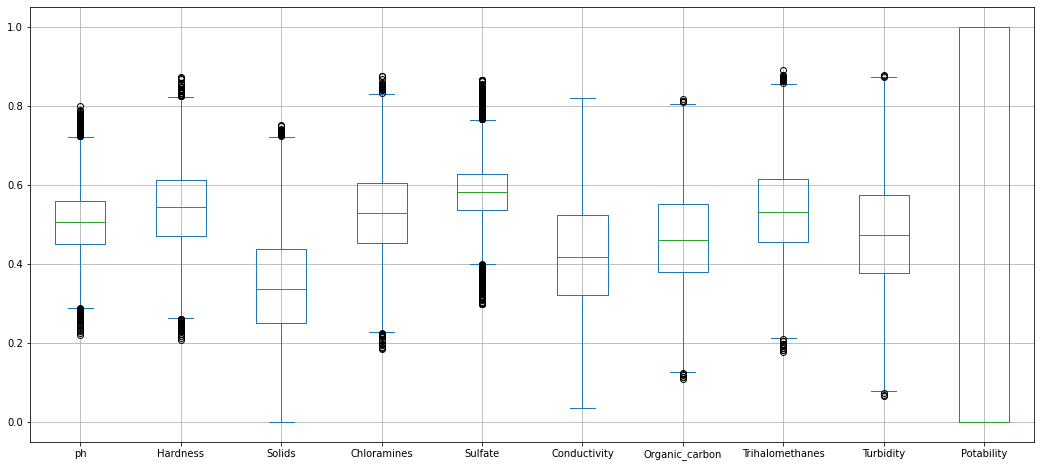

In [10]:
data_set.plot(kind = 'box',
                figsize = (18,8)
)
plt.grid()

Se imprime el data set una vez ya limpio

In [11]:
data_set = data_set.reset_index()
del data_set['index']
data_set

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3039,0.433544,0.505009,0.423895,0.578908,0.615572,0.409897,0.378070,0.484188,0.419685,1.0
3040,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3041,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3042,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


### Análisis de correlación

Se calcula la correlación de las variables entre cada una de ellas y se grafican los resultados en la siguiente tabla

Text(0.5, 1.0, 'Correlación de las variables')

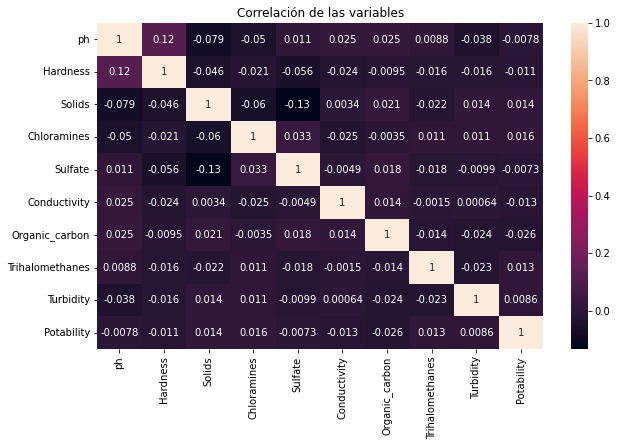

In [12]:
corr = data_set.corr()
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr,
            xticklabels = True,
            yticklabels = True,
            annot = True,
            ax=ax
)
plt.title('Correlación de las variables')

* Tomando en cuenta la tabla, los valores de las correlaciones estan cercanos a 0, por lo tanto todas las variables aportan información y se tomaran en cuenta para el entrenamiento de los algoritmos.

## Algoritmos

Se importan las librerias necesarias para:
*   Dividir los datos en conjuntos de entrenamiento y test
*   Entrenar y utilizar **Redes Neuronales**
*   Entrenar y utilizar el algoritmo **Gradient Boosting**
*   Entrenar y utilizar el algoritmo **KNN**

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models, metrics, optimizers

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### División de datos

Se extraen las columnas que se usarán para predecir la potabilidad del agua

In [14]:
data_set_X = data_set.drop(['Potability'], axis = 1).values

Se extrae la columna que indica la potabilidad del agua, la cual seria la columna a predecir

In [15]:
data_set_Y = data_set['Potability'].values
data_set_Y

array([0., 0., 0., ..., 1., 1., 1.])

Se realiza la division entre datos de entrenamiento y de test, asignando el 80% de datos para entrenamiento y el 20% para testear los modelos

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data_set_X, data_set_Y, test_size = 0.2, random_state = 0)

### Algoritmo visto en clases (Gradient Boosting)

Gradient Boosting consiste en algoritmos débiles (arboles de decisión), que por si solos no entregan buenos resultados, pero que en forma conjunta constituyen un algoritmo fuerte y robusto capaz de resolver problemas de regresión y clasificación.

Se genera el rango de variación de los parametros para Gradient Boosting

In [17]:
param_GB = {'n_estimators': range(100, 1000, 100),
            'max_depth': range(2, 6),
            'loss': ['deviance', 'exponential']}

Se crea el clasificador y se configura la busqueda de los hiperparametros


In [18]:
GradBoost = GradientBoostingClassifier()

In [19]:
gsearch_GB = GridSearchCV(GradBoost, param_grid=param_GB, scoring='r2', cv=5, return_train_score=True)

Se entrena el modelo con los datos de entrenamiento

In [20]:
gsearch_GB.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': range(2, 6),
                         'n_estimators': range(100, 1000, 100)},
             return_train_score=True, scoring='r2')

Se imprimen los mejores parametros encontrados junto con el promedio de scores de las 5 validaciones cruzadas hechas

In [21]:
gsearch_GB.best_params_, gsearch_GB.best_score_

({'loss': 'exponential', 'max_depth': 4, 'n_estimators': 100},
 -0.5256025729069979)

Se prueba el clasificador que tiene los mejores parametros con los datos de test

In [22]:
gsearch_GB.best_estimator_.score(X_test, y_test)

0.6518883415435139

### Algoritmo no visto en clases (KNN)

K-Nearest Neighbor (KNN) consiste en realizar una predicción de acuerdo a los “k” datos más cercanos y clasificar el punto de interés según la mayor cantidad de datos que le rodean.

In [23]:
param_KNN = {'n_neighbors': range(1, 100),
            'weights': ['uniform','distance']}

Se crea el clasificador y se configura la busqueda de los hiperparametros

In [24]:
KNN = KNeighborsClassifier()

In [25]:
gsearch_KNN = GridSearchCV(KNN, param_grid=param_KNN, scoring='r2', cv=5, return_train_score=True)

Se entrena el modelo con los datos de entrenamiento

In [26]:
gsearch_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2')

Se imprimen los mejores parametros encontrados junto con el promedio de scores de las 5 validaciones cruzadas hechas

In [27]:
gsearch_KNN.best_params_, gsearch_KNN.best_score_

({'n_neighbors': 40, 'weights': 'distance'}, -0.5064406719697037)

Se prueba el clasificador que tiene los mejores parametros con los datos de test

In [28]:
gsearch_KNN.best_estimator_.score(X_test, y_test)

0.6469622331691297

### Red Neuronal



<p align=justify>Una red neuronal es un modelo simplificado que intenta emular el funcionamiento de un cerebro humano. Generalmente son organizadas en capas, teniendo la capa de entrada, las capas ocultas y la capa de salida. Estas capas estan conectadas entre si y sus conexiones tienen pesos asociados, los cuales se autoajustan cuando la red realiza predicciones incorrectas para un registro al momento en que esta es entrenada.</p>

Se realizan las particiones de datos en 70% para entrenamiento, 20% para test y 10% para validación.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_set_X, data_set_Y, test_size = 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125, random_state = 0)

In [30]:
import os
os.environ["KMP_SETTINGS"] = "false"

Se crea el modelo de la red neuronal

In [31]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_dim = 9))
model.add(layers.Dense(12, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 13        
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


2022-01-03 17:48:27.790401: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Se definen los parametros de compilado y se entrena el modelo

In [32]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
epochs = 100

history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    validation_data = (X_val,y_val),
                    batch_size = 32)

2022-01-03 17:48:28.246315: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
67/67 [==============================] - 1s 6ms/step - loss: 0.6715 - accuracy: 0.6192 - val_loss: 0.6745 - val_accuracy: 0.5934
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6696 - accuracy: 0.6225 - val_loss: 0.6744 - val_accuracy: 0.5934
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6668 - accuracy: 0.6244 - val_loss: 0.6749 - val_accuracy: 0.5934
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 0.6672 - accuracy: 0.6254 - val_loss: 0.6742 - val_accuracy: 0.5934
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6249 - val_loss: 0.6755 - val_accuracy: 0.5934
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.6254 - val_loss: 0.6740 - val_accuracy: 0.5934
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6254 - val_loss: 0.6737 - val_accuracy: 0.5934
Epoch 8/100
6

Se prueba el modelo con el conjunto de test

In [33]:
model.evaluate(X_test,y_test)

20/20 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6174


[0.6331933736801147, 0.6174055933952332]

## Comentarios y Conclusiones Finales

Los resultados obtenidos con los 3 algoritmos no muestran buenas predicciones, rondando entre el 60% y 70% de accuracy. 
Comparando con otros trabajos realizados en Kaggle vemos que todos los trabajos rondan los mismos porcentajes de predicción. Uno en particular logra sobresalir con un 76%, debido que hizo uso de una técnica adicional. Observó que había un desbalance en los datos, esto es que había muchas más muestras de agua no potable que potable, por lo que hizo un sobre-muestreo mediante Synthetic Minority Oversampling Technique (SMOT) para afectar y mejorar el rendimiento. Finalizando, una hipótesis que se cree es que a pesar que la correlación entre los predictores es baja, no entregan la suficiente información, que sea relevante, para poder pronosticar si el agua es potable o no, obteniéndose resultados menores al 80% con la mayoría de los clasificadores.
